In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [20]:
# Load the dataset
df = pd.read_csv("/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/breast-cancer.csv")
base_dir = "/home/ichigo/Desktop/Medical diagnosis uisng AI"

In [3]:
# Display basic info
print("First 5 rows:")
print(df.head())


First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_w

In [4]:
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064  

In [6]:
print("\nData types:")
print(df.info())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se 

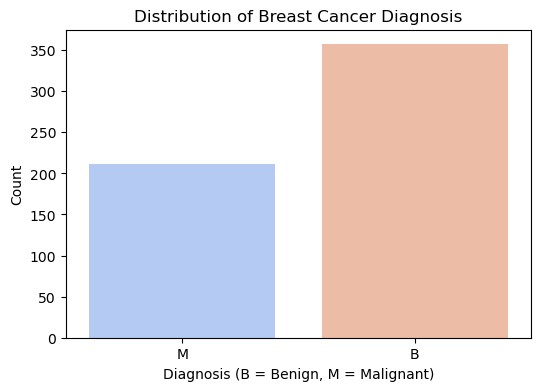

In [7]:
# Check class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['diagnosis'], palette='coolwarm')
plt.title("Distribution of Breast Cancer Diagnosis")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

In [8]:
# 1. Preprocessing
print("Preprocessing data...")
# Convert diagnosis to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


Preprocessing data...


In [9]:
# Features (excluding id and diagnosis)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']


In [10]:
# Initial feature set
initial_features = X.columns.tolist()
print(f"Initial features: {initial_features}")

Initial features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Splitting data...
Training set shape: (455, 30)
Test set shape: (114, 30)


Creating class distribution plot...


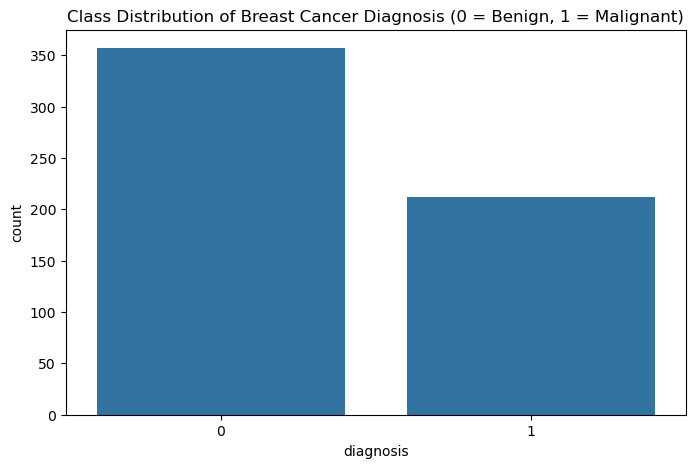

In [12]:
# 2. Visualization - Class Distribution
print("Creating class distribution plot...")
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution of Breast Cancer Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

In [13]:
# 3. Model Training using Random Forest
print("\nTraining Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)
print("Model trained successfully!")



Training Random Forest model...
Model trained successfully!


In [14]:
# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Initial Features: {accuracy:.4f}")

Accuracy with Initial Features: 0.9649


In [15]:
# 4. Feature Reduction
print("\nPerforming feature reduction...")
# Feature importance
importance = pd.DataFrame({
    "Feature": initial_features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nFeature Importance:\n", importance)



Performing feature reduction...

Feature Importance:
                     Feature  Importance
23               area_worst    0.139065
7       concave points_mean    0.118462
27     concave points_worst    0.114405
22          perimeter_worst    0.092378
20             radius_worst    0.077126
6            concavity_mean    0.072469
0               radius_mean    0.050456
3                 area_mean    0.048804
2            perimeter_mean    0.046564
26          concavity_worst    0.040300
13                  area_se    0.025419
21            texture_worst    0.021879
1              texture_mean    0.018859
25        compactness_worst    0.016495
10                radius_se    0.016154
5          compactness_mean    0.013223
24         smoothness_worst    0.010034
12             perimeter_se    0.009492
16             concavity_se    0.007982
28           symmetry_worst    0.007731
4           smoothness_mean    0.007651
14            smoothness_se    0.006289
15           compactness_

In [16]:
# Select top 10 features
top_features = importance["Feature"].head(10).tolist()
print(f"Top 10 Features: {top_features}")

Top 10 Features: ['area_worst', 'concave points_mean', 'concave points_worst', 'perimeter_worst', 'radius_worst', 'concavity_mean', 'radius_mean', 'area_mean', 'perimeter_mean', 'concavity_worst']


In [17]:
# Retrain with reduced features
print("Retraining model with reduced features...")
X_reduced = X[top_features]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


Retraining model with reduced features...


In [18]:
model_reduced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model_reduced.fit(X_train_red, y_train_red)
y_pred_red = model_reduced.predict(X_test_red)
reduced_accuracy = accuracy_score(y_test_red, y_pred_red)
print(f"Accuracy with Reduced Features: {reduced_accuracy:.4f}")

Accuracy with Reduced Features: 0.9561


In [21]:
# 5. Save the model
print("\nSaving model...")
model_path = os.path.join(base_dir, "breast_cancer_model.pkl")
try:
    with open(model_path, "wb") as file:
        pickle.dump(model_reduced, file)
    print(f"Saved model to {model_path}")
except Exception as e:
    print(f"Error saving model: {str(e)}")


Saving model...
Saved model to /home/ichigo/Desktop/Medical diagnosis uisng AI/breast_cancer_model.pkl
